# Socioviews

### Imports

In [33]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

## Preprocessament de dades

### Carregar les dades

In [2]:
resultat_path = os.path.join('dades', 'resultat')

#### Dades demogràfiques

In [3]:
# Llegir fitxer
demografica = pd.read_csv(os.path.join(resultat_path, 'demografica.csv'))

# Eliminar columnes innecessàries
demografica.drop(columns="Unnamed: 0", inplace=True)

# Canviar nom columna "Literal"
demografica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("Dimensió demogràfica")
print(demografica.info())

Dimensió demogràfica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19901 entries, 0 to 19900
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Codi                       19901 non-null  int64  
 1   Municipi                   19901 non-null  object 
 2   Any                        19901 non-null  int64  
 3   Total                      19901 non-null  int64  
 4   Homes                      19901 non-null  int64  
 5   Dones                      19901 non-null  int64  
 6   0-14 Anys                  19901 non-null  int64  
 7   15-64 Anys                 19901 non-null  int64  
 8   64 o més                   19901 non-null  int64  
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17988 non-null  float64
 12  Immigracions               17988 non-null  float64
 13  Emigracions              

In [4]:
demografica

,Codi,Municipi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,Índex de sobreenvelliment,Saldo migratori total,Immigracions,Emigracions
0,250019,Abella de la Conca,2000,197,106,91,31,125,41,NaN,NaN,NaN,NaN,NaN
1,80018,Abrera,2000,8177,4203,3974,1325,6162,690,NaN,NaN,NaN,NaN,NaN
2,250024,Àger,2000,528,284,244,39,299,190,NaN,NaN,NaN,NaN,NaN
3,250030,Agramunt,2000,4902,2506,2396,694,3152,1056,NaN,NaN,NaN,NaN,NaN
4,80023,Aguilar de Segarra,2000,213,106,107,26,114,73,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,431779,Vinebre,2020,425,215,210,64,263,98,NaN,NaN,7.0,23.0,16.0
19897,431785,Vinyols i els Arcs,2020,2124,1113,1011,371,1405,348,NaN,NaN,66.0,190.0,124.0
19898,83089,Viver i Serrateix,2020,172,88,84,27,98,47,NaN,NaN,6.0,8.0,2.0
19899,430521,Xerta,2020,1154,569,585,116,697,341,NaN,NaN,17.0,49.0,32.0


#### Dades econòmiques

In [5]:
# Llegir fitxer
economica = pd.read_csv(os.path.join(resultat_path, 'economica.csv'))

# Eliminar columnes innecessàries
economica.drop(columns=["Unnamed: 0", "Evolucio atur"], inplace=True)

# Canviar nom columna "Literal"
economica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió econòmica")
print(economica.info())


Dimensió econòmica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9824 entries, 0 to 9823
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Municipi         9824 non-null   object 
 1   Codi             9824 non-null   int64  
 2   Any              9824 non-null   int64  
 3   Aturats          8523 non-null   float64
 4   Poblacio activa  762 non-null    float64
 5   Renda            4086 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 460.6+ KB
None


In [6]:
economica

,Municipi,Codi,Any,Aturats,Poblacio activa,Renda
0,Abella de la Conca,250019,2012,11.9,NaN,NaN
1,Abrera,80018,2012,961.2,NaN,16.8
2,Àger,250024,2012,12.8,NaN,NaN
3,Agramunt,250030,2012,372.0,NaN,13.3
4,Aguilar de Segarra,80023,2012,9.1,NaN,NaN
...,...,...,...,...,...,...
9819,Vallbona d'Anoia,82922,2011,NaN,NaN,20.9
9820,Vandellòs i l'Hospitalet de l'Infant,431628,2011,NaN,NaN,13.9
9821,"Vendrell, el",431634,2011,NaN,NaN,18.8
9822,Vila-rodona,431704,2011,NaN,NaN,14.9


#### Dades residencials

In [7]:
# Llegir fitxer
residencial = pd.read_csv(os.path.join(resultat_path, 'residencial.csv'))

# Eliminar columnes innecessàries
residencial.drop(columns="Unnamed: 0", inplace=True)

# Canviar nom columna "Literal"
residencial.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió residencial")
print(residencial.info())


Dimensió residencial
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         5069 non-null   object 
 1   Codi                             5069 non-null   int64  
 2   Any                              5069 non-null   int64  
 3   Demanda                          3408 non-null   float64
 4   Habitatges familiars secundaris  1893 non-null   float64
 5   Habitatges familiars vacants     1893 non-null   float64
 6   Habitatges familiars altres      946 non-null    float64
 7   Habitatges familiars principals  1893 non-null   float64
 8   De lloguer                       1411 non-null   float64
 9   De propietat                     1411 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 396.1+ KB
None


In [8]:
residencial

,Municipi,Codi,Any,Demanda,Habitatges familiars secundaris,Habitatges familiars vacants,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat
0,Abrera,80018,2020,23.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Agramunt,250030,2020,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Agullana,170010,2020,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Aiguafreda,80142,2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Aitona,250387,2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5064,Torre de Claramunt la,82861,2011,NaN,NaN,NaN,NaN,NaN,0.0,1204.0
5065,Vall d'en Bas la,172076,2011,NaN,NaN,NaN,NaN,NaN,173.0,815.0
5066,Vall de Bianya la,172082,2011,NaN,NaN,NaN,NaN,NaN,93.0,331.0
5067,Vall de Boí la,250432,2011,NaN,NaN,NaN,NaN,NaN,0.0,356.0


#### Dades urbanístiques

In [9]:
# Llegir fitxer
urbanistica = pd.read_csv(os.path.join(resultat_path, 'urbanistica.csv'))

# Eliminar columnes innecessàries
urbanistica.drop(columns=["Unnamed: 0", "Riscos"], inplace=True)

# Canviar nom columna "Literal"
urbanistica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió urbanística")
print(urbanistica.info())


Dimensió urbanística
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Any                 8526 non-null   int64  
 1   Serveis             8523 non-null   float64
 2   Municipi            8526 non-null   object 
 3   Codi                8526 non-null   int64  
 4   Solar               8523 non-null   float64
 5   Zones verdes        8523 non-null   float64
 6   Equipament          8523 non-null   float64
 7   Connectivitat       8523 non-null   float64
 8   Densitat comercial  2841 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 599.6+ KB
None


In [10]:
urbanistica

,Any,Serveis,Municipi,Codi,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial
0,2012,8.7221,Igualada,81022,289.6733,71.1228,16.9165,144.8569,NaN
1,2012,0.0000,Cardona,80478,38.7941,4.1436,16.3507,15.8741,NaN
2,2012,0.0000,"Llacuna, la",81043,13.1967,0.8157,27.4038,9.6753,NaN
3,2012,0.0000,Castellcir,80556,6.0954,0.5995,6.4467,5.0652,NaN
4,2012,7.1210,Castellbisbal,80543,402.8976,240.6678,22.4913,137.4469,NaN
...,...,...,...,...,...,...,...,...,...
8521,2020,0.0000,"Pla de Santa Maria, el",431080,22.8759,4.2432,29.7450,11.5493,NaN
8522,2020,0.0000,"Pobla de Mafumet, la",431093,26.1562,2.2511,15.3493,17.0407,NaN
8523,2017,NaN,"Cruïlles, Monells i Sant Sadurní de l'Heura",179011,NaN,NaN,NaN,NaN,194.0
8524,2018,NaN,"Cruïlles, Monells i Sant Sadurní de l'Heura",179011,NaN,NaN,NaN,NaN,239.0


#### Dades històriques habitatge social

In [11]:
# Llegir fitxer
habitatges = pd.read_excel(os.path.join('dades', 'habitatge_social.xlsx'))

# Eliminar columnes innecessàries
habitatges.drop(columns=["Data Construcció", "Total Hab"], inplace=True)

# Imprimir info
print(habitatges.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Municipi     238 non-null    object
 1   Any          238 non-null    int64 
 2   Hab Lloguer  238 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.7+ KB
None


#### Municipis de Catalunya

In [12]:
# Llegir fitxer
municipis = pd.read_csv(os.path.join('dades', 'noms_municipis.csv'))

# Eliminar columnes innecessàries
municipis.drop(columns="NomMun", inplace=True)

# Imprimir info
print(municipis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Municipi  947 non-null    object
 1   Codi      947 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.9+ KB
None


### Combinar dades

#### Afegir Codi municipi a llistat habitatges construïts

In [13]:
habitatges = habitatges.merge(municipis, how="left", on="Municipi")
habitatges["Codi"] = habitatges["Codi"].astype(int).astype(str)
habitatges

,Municipi,Any,Hab Lloguer,Codi
0,Abrera,2010,30,80018
1,Abrera,2010,30,80018
2,Alcover,2006,8,430056
3,Alella,2001,8,80039
4,Alella,2009,61,80039
...,...,...,...,...
233,Vilanova i la Geltrú,2003,35,83073
234,Vilanova i la Geltrú,2008,34,83073
235,Vilanova i la Geltrú,2008,64,83073
236,Vila-seca,2006,30,431711


#### Combinar municipis on s'ha construït el mateix any 

In [14]:
habitatges = habitatges.groupby(by = ["Municipi", "Any"]).sum().reset_index()
habitatges

,Municipi,Any,Hab Lloguer
0,Abrera,2010,60
1,Alcover,2006,8
2,Alella,2001,8
3,Alella,2009,61
4,Alguaire,2008,14
...,...,...,...
200,Vilanova i la Geltrú,1994,24
201,Vilanova i la Geltrú,1998,18
202,Vilanova i la Geltrú,2003,35
203,Vilanova i la Geltrú,2008,98


#### Creació d'un dataframe amb una fila per any i municipi

In [15]:
# Anys a realitzar l'estudi 
years = range(2000, 2021)

# Creació dataframe
municipis = pd.concat([municipis.assign(Any = y) for y in years], ignore_index=True)

# Imprimir info
print(municipis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19887 entries, 0 to 19886
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Municipi  19887 non-null  object
 1   Codi      19887 non-null  int64 
 2   Any       19887 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 466.2+ KB
None


#### Combinar municipis amb dades indicadors socioeconòmics 

In [16]:
# Demogràfica
indicadors = municipis.merge(demografica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipi                   19887 non-null  object 
 1   Codi                       19887 non-null  int64  
 2   Any                        19887 non-null  int64  
 3   Total                      19775 non-null  float64
 4   Homes                      19775 non-null  float64
 5   Dones                      19775 non-null  float64
 6   0-14 Anys                  19775 non-null  float64
 7   15-64 Anys                 19775 non-null  float64
 8   64 o més                   19775 non-null  float64
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17893 non-null  float64
 12  Immigracions               17893 non-null  float64
 13  Emigracions                17893 non-null  flo

In [17]:
# Economica
indicadors = indicadors.merge(economica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipi                   19887 non-null  object 
 1   Codi                       19887 non-null  int64  
 2   Any                        19887 non-null  int64  
 3   Total                      19775 non-null  float64
 4   Homes                      19775 non-null  float64
 5   Dones                      19775 non-null  float64
 6   0-14 Anys                  19775 non-null  float64
 7   15-64 Anys                 19775 non-null  float64
 8   64 o més                   19775 non-null  float64
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17893 non-null  float64
 12  Immigracions               17893 non-null  float64
 13  Emigracions                17893 non-null  flo

In [18]:
# Residencial
indicadors = indicadors.merge(residencial, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         19887 non-null  object 
 1   Codi                             19887 non-null  int64  
 2   Any                              19887 non-null  int64  
 3   Total                            19775 non-null  float64
 4   Homes                            19775 non-null  float64
 5   Dones                            19775 non-null  float64
 6   0-14 Anys                        19775 non-null  float64
 7   15-64 Anys                       19775 non-null  float64
 8   64 o més                         19775 non-null  float64
 9   Índex d'envelliment              500 non-null    float64
 10  Índex de sobreenvelliment        500 non-null    float64
 11  Saldo migratori total            17893 non-null  float64
 12  Immigracions      

In [19]:
# Urbanistica
indicadors = indicadors.merge(urbanistica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         19887 non-null  object 
 1   Codi                             19887 non-null  int64  
 2   Any                              19887 non-null  int64  
 3   Total                            19775 non-null  float64
 4   Homes                            19775 non-null  float64
 5   Dones                            19775 non-null  float64
 6   0-14 Anys                        19775 non-null  float64
 7   15-64 Anys                       19775 non-null  float64
 8   64 o més                         19775 non-null  float64
 9   Índex d'envelliment              500 non-null    float64
 10  Índex de sobreenvelliment        500 non-null    float64
 11  Saldo migratori total            17893 non-null  float64
 12  Immigracions      

#### Expansió de les dades

In [20]:
# Renda familiar
renda_in = indicadors.loc[indicadors["Any"] == 2018, ["Municipi", "Renda"]]
for any in [2019, 2020]:
    indicadors.loc[(indicadors["Any"] == any), "Renda"] = renda_in["Renda"].values

In [21]:
# Població activa
poblacio_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", "Poblacio activa"]]
for any in range(2012, 2021):
    indicadors.loc[(indicadors["Any"] == any), "Poblacio activa"] = poblacio_in["Poblacio activa"].values

In [22]:
# Tipus d'Habitatge
for ind in ["Habitatges familiars secundaris", "Habitatges familiars vacants", "Habitatges familiars altres", "Habitatges familiars principals"]:

    # Any 2001
    tipus_in = indicadors.loc[indicadors["Any"] == 2001, ["Municipi", ind]]
    for any in range(2002, 2011):
        indicadors.loc[(indicadors["Any"] == any), ind] = tipus_in[ind].values

    # Any 2011
    tipus_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", ind]]
    for any in range(2012, 2021):
        indicadors.loc[(indicadors["Any"] == any), ind] = tipus_in[ind].values

In [23]:
# Tinença
for ind in ["De lloguer", "De propietat"]:

    # Any 2001
    tinença_in = indicadors.loc[indicadors["Any"] == 2001, ["Municipi", ind]]
    for any in range(2002, 2011):
        indicadors.loc[(indicadors["Any"] == any), ind] = tinença_in[ind].values

    # Any 2011
    tinença_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", ind]]
    for any in range(2012, 2021):
        indicadors.loc[(indicadors["Any"] == any), ind] = tinença_in[ind].values

In [24]:
# Densitat comercial
comerc_in = indicadors.loc[indicadors["Any"] == 2018, ["Municipi", "Densitat comercial"]]
for any in [2019, 2020]:
    indicadors.loc[(indicadors["Any"] == any), "Densitat comercial"] = comerc_in["Densitat comercial"].values

In [25]:
indicadors

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial
0,Abella de la Conca,250019,2000,197.0,106.0,91.0,31.0,125.0,41.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrera,80018,2000,8177.0,4203.0,3974.0,1325.0,6162.0,690.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Àger,250024,2000,528.0,284.0,244.0,39.0,299.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agramunt,250030,2000,4902.0,2506.0,2396.0,694.0,3152.0,1056.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguilar de Segarra,80023,2000,213.0,106.0,107.0,26.0,114.0,73.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,235.0,215.0,44.0,262.0,144.0,NaN,...,NaN,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0
19883,Vinebre,431779,2020,425.0,215.0,210.0,64.0,263.0,98.0,NaN,...,NaN,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0
19884,Vinyols i els Arcs,431785,2020,2124.0,1113.0,1011.0,371.0,1405.0,348.0,NaN,...,NaN,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0
19885,Viver i Serrateix,83089,2020,172.0,88.0,84.0,27.0,98.0,47.0,NaN,...,NaN,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0


#### Normalitzar les dades de població en percentatge respecte a la població total del municipi

In [27]:
for ind in ["Homes", "Dones", "0-14 Anys", "15-64 Anys", "64 o més", "Immigracions", "Emigracions"]:
    indicadors[ind] = indicadors[ind]/indicadors["Total"]


In [28]:
indicadors

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial
0,Abella de la Conca,250019,2000,197.0,0.002731,0.002345,0.000799,0.003221,0.001056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrera,80018,2000,8177.0,0.000063,0.000059,0.000020,0.000092,0.000010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Àger,250024,2000,528.0,0.001019,0.000875,0.000140,0.001073,0.000682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agramunt,250030,2000,4902.0,0.000104,0.000100,0.000029,0.000131,0.000044,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguilar de Segarra,80023,2000,213.0,0.002336,0.002358,0.000573,0.002513,0.001609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.001160,0.001062,0.000217,0.001294,0.000711,NaN,...,NaN,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0
19883,Vinebre,431779,2020,425.0,0.001190,0.001163,0.000354,0.001456,0.000543,NaN,...,NaN,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0
19884,Vinyols i els Arcs,431785,2020,2124.0,0.000247,0.000224,0.000082,0.000311,0.000077,NaN,...,NaN,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0
19885,Viver i Serrateix,83089,2020,172.0,0.002975,0.002839,0.000913,0.003313,0.001589,NaN,...,NaN,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0


#### Integrar a les dades dels indicadors la variable a predir

In [30]:
# Estudi es centra del 2000 en endavant -> Dades només a partir del 2000
habitatges = habitatges[habitatges["Any"] >= 2000]
habitatges.shape
# Exportar dades
habitatges.to_csv(os.path.join("dades", "habitatges.csv"))

In [31]:
data = indicadors.merge(habitatges, how="left", on=["Municipi", "Any"])
data

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial,Hab Lloguer
0,Abella de la Conca,250019,2000,197.0,0.002731,0.002345,0.000799,0.003221,0.001056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrera,80018,2000,8177.0,0.000063,0.000059,0.000020,0.000092,0.000010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Àger,250024,2000,528.0,0.001019,0.000875,0.000140,0.001073,0.000682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agramunt,250030,2000,4902.0,0.000104,0.000100,0.000029,0.000131,0.000044,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguilar de Segarra,80023,2000,213.0,0.002336,0.002358,0.000573,0.002513,0.001609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.001160,0.001062,0.000217,0.001294,0.000711,NaN,...,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0,NaN
19883,Vinebre,431779,2020,425.0,0.001190,0.001163,0.000354,0.001456,0.000543,NaN,...,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0,NaN
19884,Vinyols i els Arcs,431785,2020,2124.0,0.000247,0.000224,0.000082,0.000311,0.000077,NaN,...,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0,NaN
19885,Viver i Serrateix,83089,2020,172.0,0.002975,0.002839,0.000913,0.003313,0.001589,NaN,...,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0,NaN


#### Variable a predir

La variable que volem predir és la presència/absència d'habitatge social en aquell any. Per això, utilitzarem la columna "Hab Lloguer" per obtenir aquesta nova variable que serà igual a 1 si hi ha hagut com a mínim una construcció d'habitatge social en aquell municipi i aquell any.

In [32]:
data.loc[data["Hab Lloguer"].isna(), "Hab Lloguer"] = 0
data.loc[data["Hab Lloguer"] > 0, "Hab Lloguer"] = 1

In [33]:
data

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial,Hab Lloguer
0,Abella de la Conca,250019,2000,197.0,0.002731,0.002345,0.000799,0.003221,0.001056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Abrera,80018,2000,8177.0,0.000063,0.000059,0.000020,0.000092,0.000010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Àger,250024,2000,528.0,0.001019,0.000875,0.000140,0.001073,0.000682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Agramunt,250030,2000,4902.0,0.000104,0.000100,0.000029,0.000131,0.000044,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Aguilar de Segarra,80023,2000,213.0,0.002336,0.002358,0.000573,0.002513,0.001609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.001160,0.001062,0.000217,0.001294,0.000711,NaN,...,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0,0.0
19883,Vinebre,431779,2020,425.0,0.001190,0.001163,0.000354,0.001456,0.000543,NaN,...,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0,0.0
19884,Vinyols i els Arcs,431785,2020,2124.0,0.000247,0.000224,0.000082,0.000311,0.000077,NaN,...,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0,0.0
19885,Viver i Serrateix,83089,2020,172.0,0.002975,0.002839,0.000913,0.003313,0.001589,NaN,...,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0,0.0


#### Exportar les dades

In [34]:
data.to_csv(os.path.join("dades", "indicadors.csv"))

## Model predictiu


In [43]:
data = pd.read_csv(os.path.join("dades", "indicadors.csv"))
data.drop(columns="Unnamed: 0", inplace=True)

#### Eliminar columnes on faltin moltes dades

In [44]:
for column in data.columns:
    if len(data[data[column].isna()]) > 14000:
        print(len(data[data[column].isna()]))
        print("Dropping column " + str(column))
        data.drop(columns=column, inplace=True)
data

19387
Dropping column Índex d'envelliment
19387
Dropping column Índex de sobreenvelliment
14893
Dropping column Renda
16479
Dropping column Demanda
16103
Dropping column Densitat comercial


,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Saldo migratori total,...,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Hab Lloguer
0,Abella de la Conca,250019,2000,197.0,0.002731,0.002345,0.000799,0.003221,0.001056,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Abrera,80018,2000,8177.0,0.000063,0.000059,0.000020,0.000092,0.000010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Àger,250024,2000,528.0,0.001019,0.000875,0.000140,0.001073,0.000682,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Agramunt,250030,2000,4902.0,0.000104,0.000100,0.000029,0.000131,0.000044,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Aguilar de Segarra,80023,2000,213.0,0.002336,0.002358,0.000573,0.002513,0.001609,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.001160,0.001062,0.000217,0.001294,0.000711,19.0,...,NaN,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,0.0
19883,Vinebre,431779,2020,425.0,0.001190,0.001163,0.000354,0.001456,0.000543,7.0,...,NaN,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,0.0
19884,Vinyols i els Arcs,431785,2020,2124.0,0.000247,0.000224,0.000082,0.000311,0.000077,66.0,...,NaN,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,0.0
19885,Viver i Serrateix,83089,2020,172.0,0.002975,0.002839,0.000913,0.003313,0.001589,6.0,...,NaN,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0


#### Imputar valors 

In [45]:
# Get numerical columns
num_columns = data.columns[3:]
str_columns = data.columns[:3]

In [46]:
# Replace infinity values with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using column mean
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
miss_mean_imputer = miss_mean_imputer.fit(data[num_columns].values)
data[num_columns] = miss_mean_imputer.transform(data[num_columns].values)

#### Split data for training, testing and predicting

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
# Prediction data -> Any 2020
data_2020 = data[data["Any"] == 2020]
print(data_2020.shape)

X_pred = data_2020[num_columns]
X_pred.drop(columns="Hab Lloguer", inplace=True)
X_pred = X_pred.values
y_pred = data_2020["Hab Lloguer"].values

(947, 26)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
# Train - test split
data_no_2020 = data[data["Any"] != 2020]
X = data_no_2020[num_columns]
X.drop(columns="Hab Lloguer", inplace=True)
X = X.values
y = data_no_2020["Hab Lloguer"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [59]:
print("X train: " + str(X_train.shape))
print("y train: " + str(y_train.shape))
print("X test: " + str(X_test.shape))
print("y test: " + str(y_test.shape))
print("X pred: " + str(X_pred.shape))
print("y pred: " + str(y_pred.shape))

X train: (17046, 22)
y train: (17046,)
X test: (1894, 22)
y test: (1894,)
X pred: (947, 22)
y pred: (947,)


In [69]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
test_predict = model.predict(X_test)
score = model.score(X_test, y_test)

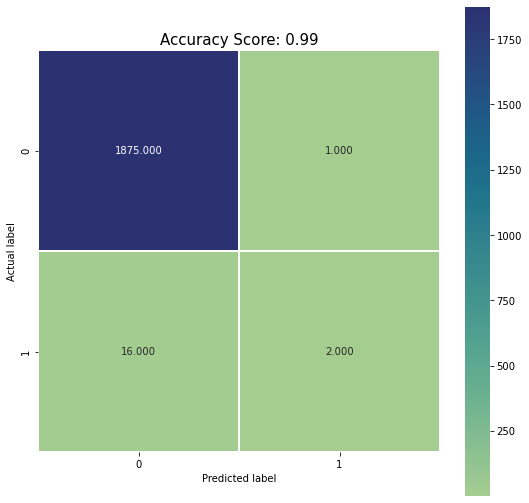

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_predict)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'crest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()